In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sys, os

In [39]:
df = pd.read_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data','stroke_data.csv'))
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [40]:
df.drop('id', axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [41]:
columnas = df.columns.drop(['stroke'])
with open(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'columnas'), "wb") as f:
    pickle.dump(columnas, f)

In [42]:
df.drop(['hypertension', 'heart_disease', 'stroke'], axis=1).describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [44]:
print(df.gender.unique())
print(df.ever_married.unique())
print(df.work_type.unique())
print(df.Residence_type.unique())
print(df.smoking_status.unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [45]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':2}).astype(np.uint8)
df['ever_married'] = df['ever_married'].replace({'No':0,'Yes':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':2,'Self-employed':3,'Govt_job':4,'children':1,'Never_worked':0}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['smoking_status'] = df['smoking_status'].replace({'never smoked':0,'smokes':2,'formerly smoked':1, 'Unknown':1}).astype(np.uint8)

In [46]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,0.586301,43.226614,0.097456,0.054012,0.656164,2.274364,0.508023,106.147677,28.893237,0.784149,0.048728
std,0.492941,22.612647,0.296607,0.226063,0.475034,0.866657,0.499985,45.283560,7.854067,0.691491,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,33.100000,1.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,2.000000,1.000000


In [47]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [48]:
def nulo(num):
    return num != num

In [49]:
df['bmi'] = np.where(nulo(df['bmi']), df['bmi'].mean(), df['bmi'])

In [50]:
type(df['bmi'][1])

numpy.float64

In [51]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

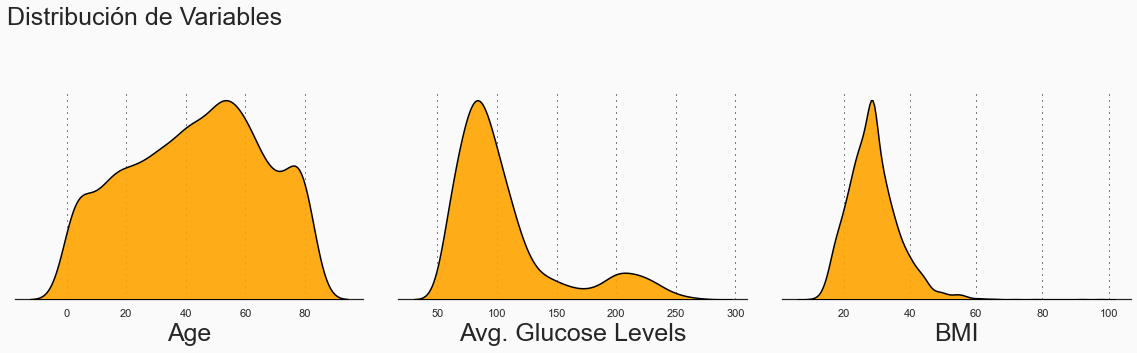

In [52]:
fig = plt.figure(figsize=(20, 20), facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)
conts = ['age','avg_glucose_level','bmi']
background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='orange', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='black', linestyle=':', dashes=(1,5))
        plot += 1
        
ax0.set_xlabel('Age', fontsize=25)
ax1.set_xlabel('Avg. Glucose Levels', fontsize=25)
ax2.set_xlabel('BMI', fontsize=25)

ax0.text(-20, 0.022, 'Distribución de Variables', fontsize=25)

plt.show()
fig.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', 'image', "var_ent.jpg"))

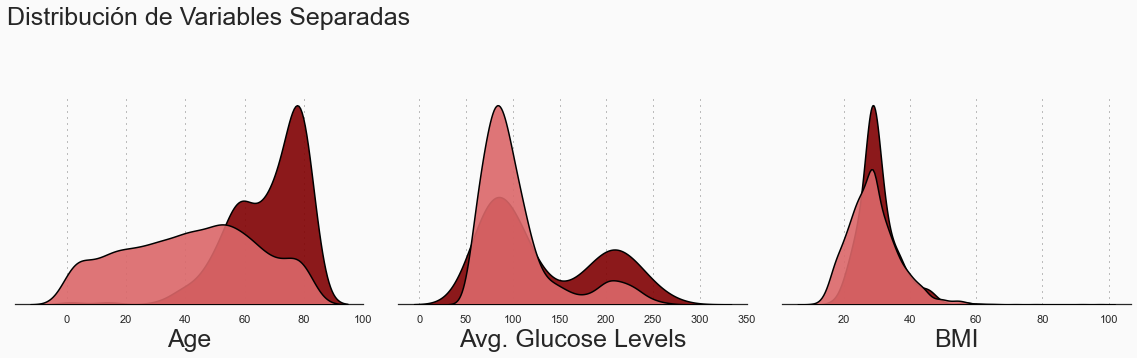

In [53]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]
conts = ['age','avg_glucose_level','bmi']
background_color = "#fafafa"

fig = plt.figure(figsize=(20, 20),facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#800002', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#db6769', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1

ax0.set_xlabel('Age', fontsize=25)
ax1.set_xlabel('Avg. Glucose Levels', fontsize=25)
ax2.set_xlabel('BMI', fontsize=25)

ax0.text(-20, 0.056, 'Distribución de Variables Separadas', fontsize=25)

plt.show()
fig.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "var_sep.jpg"))

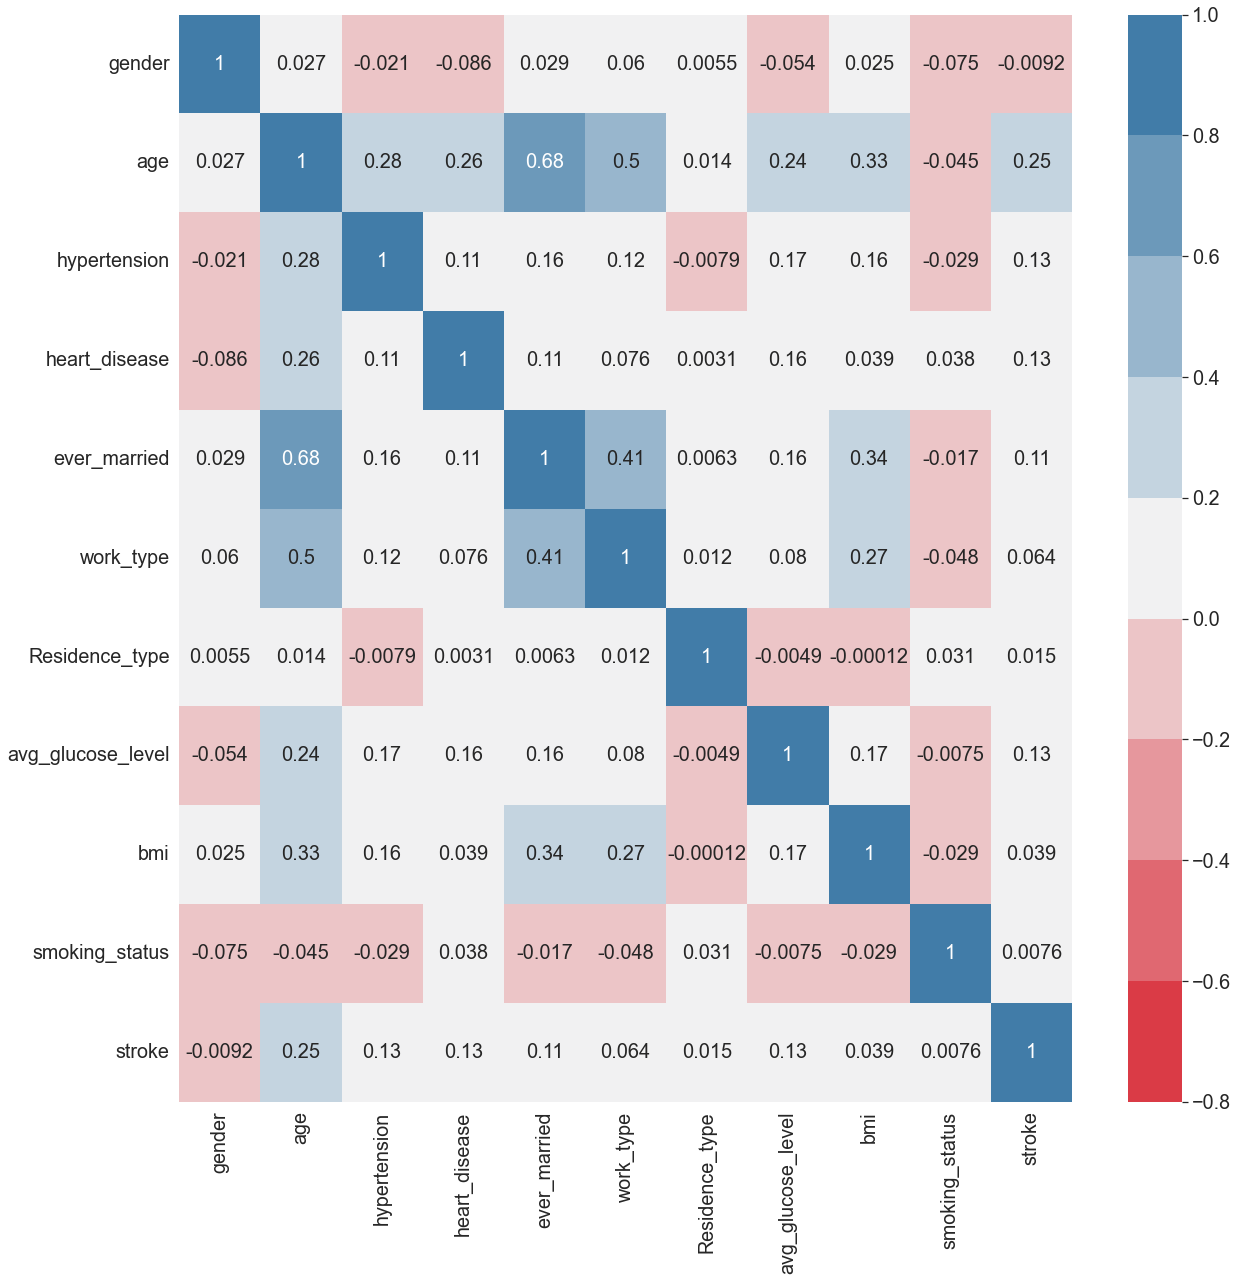

In [54]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.8)
sns.heatmap(df.corr(),
           vmin=-0.8,
           vmax=1,
           cmap=sns.diverging_palette(10, 240, n=9),
           annot=True,
           annot_kws={"size": 20})
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "corr.jpg"))

In [55]:
X  = df.drop('stroke', axis=1)
y = df['stroke']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

SELECCIÓN DE MODELO

In [57]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVC',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [58]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
[[3856   26]
 [ 200    6]]
Accuracy Score:  0.9447162426614482

K-Fold Validation Mean Accuracy: 94.91 %

Standard Deviation: 1.29 %

ROC AUC Score: 0.51 %

Precision: 0.19 %

Recall: 0.03 %

F1 Score: 0.05 %
----------------------------------------

Logistic Regression :
[[3882    0]
 [ 206    0]]
Accuracy Score:  0.9496086105675147

K-Fold Validation Mean Accuracy: 95.79 %

Standard Deviation: 0.43 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

SVC :
[[3882    0]
 [ 206    0]]
Accuracy Score:  0.9496086105675147

K-Fold Validation Mean Accuracy: 95.79 %

Standard Deviation: 0.43 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

KNeigbors :
[[3851   31]
 [ 202    4]]
Accuracy Score:  0.9430039138943248

K-Fold Validation Mean Accuracy: 95.69 %

Standard Deviation: 1.00 %

ROC AUC Score: 0.51 %

Precision: 0.11 %

Recall: 0.02 %


In [59]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by='Accuracy',inplace=True,ascending=False)
df2.to_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'data', 'comparaciones.csv'), index=False)
df2

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
1,Logistic Regression,94.960861,95.793832,0.434906,0.500000,0.000000,0.000000,0.000000
2,SVC,94.960861,95.793832,0.434906,0.500000,0.000000,0.000000,0.000000
6,RandomForest,94.863014,95.303636,0.585364,0.499485,0.000000,0.000000,0.000000
0,XGBClassifier,94.471624,94.914335,1.288332,0.511214,0.187500,0.029126,0.050420
7,AdaBoostClassifier,94.422701,94.716353,1.175389,0.517852,0.225000,0.043689,0.073171
3,KNeigbors,94.300391,95.694841,0.998649,0.505716,0.114286,0.019417,0.033195
5,DecisionTree,90.998043,91.293547,1.914655,0.531997,0.110577,0.111650,0.111111
4,GaussianNB,87.255382,86.304969,3.883420,0.650194,0.172557,0.402913,0.241630


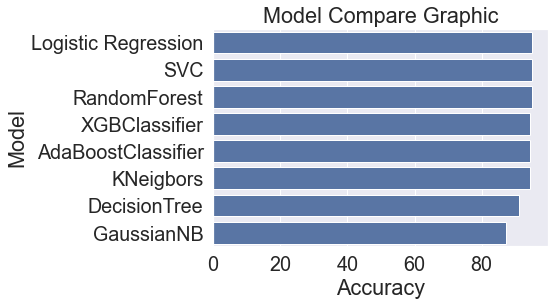

In [60]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='b')
plt.title('Model Compare Graphic');
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "comp.jpg"))

[09:15:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3882
           1       0.16      0.03      0.06       206

    accuracy                           0.94      4088
   macro avg       0.55      0.51      0.51      4088
weighted avg       0.91      0.94      0.92      4088

ROC AUC score: 0.766646408867414
Accuracy Score:  0.9422700587084148


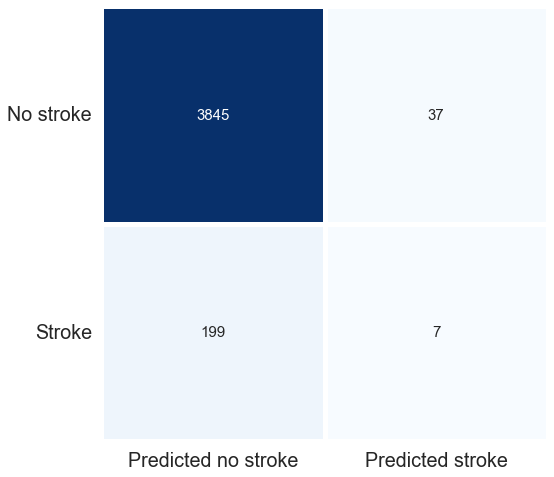

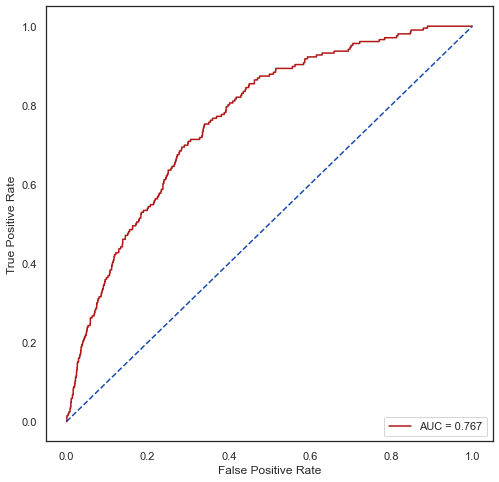

In [61]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 8))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat.jpg"))

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc.jpg"))

In [62]:
model = XGBClassifier()
model.fit(X, y)

[09:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
name = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'model', 'modelo')
with open(name, 'wb') as file:  
    pickle.dump(model, file)

In [64]:
with open(name, 'rb') as file:  
    model = pickle.load(file)

In [65]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.9943737769080235

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

model = XGBClassifier()

pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('model', model)
])

param_grid = {
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 200, 300],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid.fit(X, y)
grid.best_params_, grid.best_score_

[09:39:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'model__max_depth': 3, 'model__n_estimators': 10}, 0.8251965610321375)

In [96]:
model = XGBClassifier(max_depth= 3)
model.fit(X, y)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

[09:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9571917808219178

In [97]:
name = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'model', 'modelo')
with open(name, 'wb') as file:  
    pickle.dump(model, file)

In [98]:
with open(name, 'rb') as file:  
    model = pickle.load(file)

[09:50:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3882
           1       0.20      0.05      0.08       206

    accuracy                           0.94      4088
   macro avg       0.58      0.52      0.52      4088
weighted avg       0.91      0.94      0.93      4088

ROC AUC score: 0.7755673434272196
Accuracy Score:  0.9425146771037182


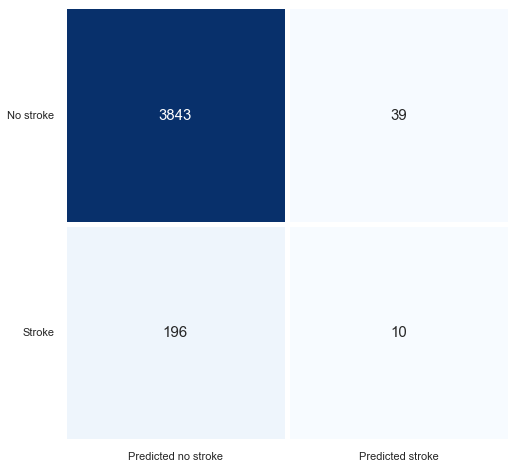

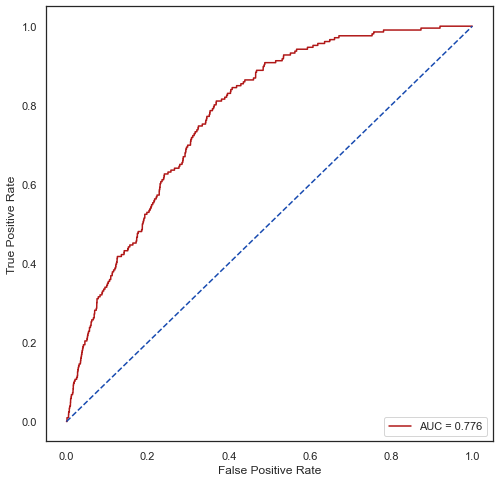

In [102]:
classifier = XGBClassifier(max_depth=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 8))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat.jpg"))

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc.jpg"))